In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [2]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# Fill null values in the 'Cabin' column with "unknown"
df['director'] = df['director'].fillna("unknown")

# Fill null values in the 'cast' column with "unknown"
df['cast'] = df['cast'].fillna("unknown")

# Fill null values in the 'country' column with "unknown"
df['country'] = df['country'].fillna("unknown")

In [5]:
df.dropna(inplace = True)

In [6]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df.duplicated().sum()

0

-----------
# Data Cleaning Done!
- Changed every Null value in the "director" column with "unkown" cause a 2634 rows had null values
- Changed every Null value in the "cast" column with "unkown" cause a 825 rows had null values
- Changed every Null value in the "country" column with "unkown" cause a 831 rows had null values
- Droped 10 Null value in the "date_added" column
- Droped 4 Null value in the "rating" column
- Droped 3 Null value in the "duration" column
- No Duplicates found




-----------------
# Distribution of Show Types

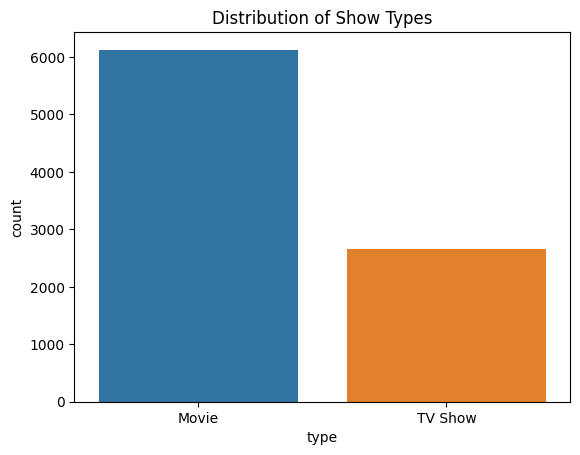

In [8]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Show Types')
plt.show()

--------------
# Top 10 Countries by Nymber of Shows

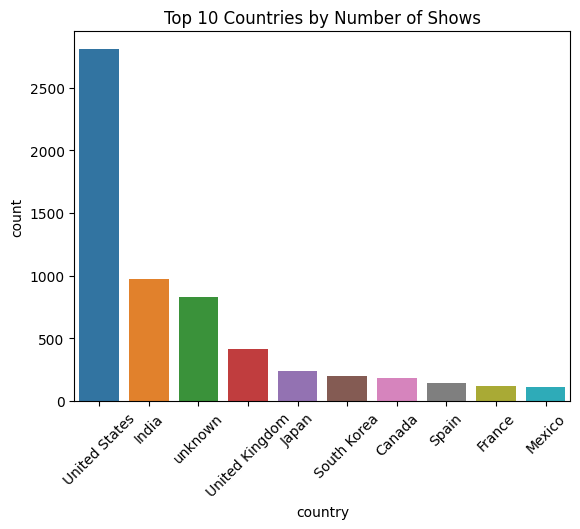

In [9]:
top_10_countries = df['country'].value_counts().head(10)
sns.barplot(x='country', y='count', data=top_10_countries.reset_index(name='count'))
plt.title('Top 10 Countries by Number of Shows')
plt.xticks(rotation=45)
plt.show()

--------------
# Top 20 Years by Number of Shows

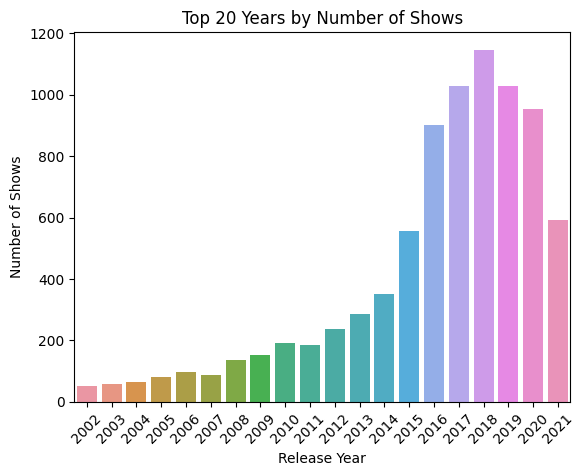

In [10]:
# Group by release year and count the number of shows
shows_by_year = df.groupby('release_year').size().reset_index(name='count')

top_20_years = shows_by_year.nlargest(20, 'count')

sns.barplot(x='release_year', y='count', data=top_20_years)
plt.title('Top 20 Years by Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()